# Step 3: Correlation Matrix 🔢

Filtering the inputs variables using a correlation Matrix can be an important step depending on the model used. In my case, I will use a Max Ent model. This model has some built-in mechanisms to handle collinearity. That's why this step is not very important in by case but it depends on the model used.


#### 📚 Required Libraries 
To calculate the correlation matrix, I need the following libraries:
- `geopandas` : to load the inputs variables
- `matplotlib` : to plot the matrix
- `seaborn` : to add an heatmap on the correlation matrix
____

### 🔢 Calcul of the Correlation Matrix and filtering of the inputs

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the files
clipped_grid_4326 = gpd.read_file("data/clipped_grid_4326_resampled.geojson")
clipped_grid_4326

,chl,no3,nppv,o2,ph,po4,zsd,bottomT,siconc,sithick,...,vo,VHM0,VTPK,VHM0_SW2,VTM01_SW2,VSDX,VSDY,VMXL,VCMX,geometry
0,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,0.0,0.0,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03035 58.25918, 10.03459 58.25935..."
1,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,0.0,0.0,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.03003 58.26142, 10.03428 58.26158..."
2,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,0.0,0.0,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02972 58.26365, 10.03396 58.26382..."
3,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,0.0,0.0,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.0294 58.26589, 10.03365 58.26606,..."
4,1.315495,1.586457,2388.953857,289.098206,8.212018,0.452668,13.304657,6.310916,0.0,0.0,...,0.065077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((10.02909 58.26813, 10.03333 58.26829..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240351,2.017805,4.840452,5646.053711,335.755066,8.171505,0.337169,8.854092,11.165191,0.0,0.0,...,0.015324,0.214206,2.066993,0.002324,2.790750,0.024698,0.016682,0.214038,0.353075,"POLYGON ((13.05616 55.68358, 13.06013 55.68364..."
240352,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,0.0,0.0,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06113 55.66344, 13.0651 55.6635, ..."
240353,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,0.0,0.0,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06102 55.66568, 13.06499 55.66575..."
240354,1.999801,4.590124,5881.569824,335.344910,8.169117,0.341800,8.900568,11.199465,0.0,0.0,...,0.012605,0.235098,2.070427,0.002749,3.482053,0.027726,0.013170,0.232769,0.389363,"POLYGON ((13.06091 55.66793, 13.06488 55.66799..."


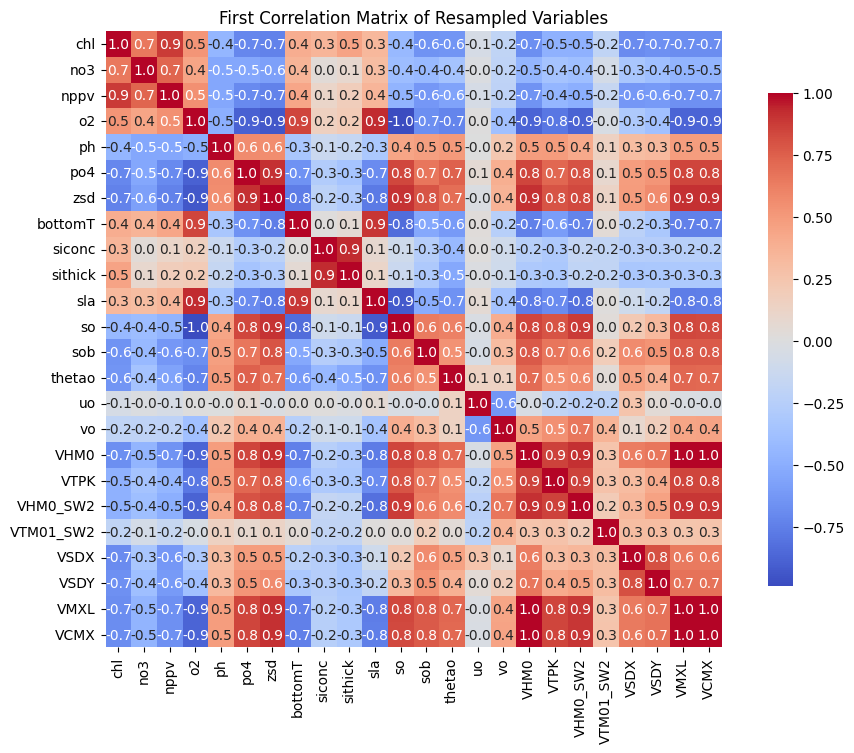

In [6]:
# Calculate the correlation matrix without the geometry column
correlation_matrix = clipped_grid_4326.drop(columns=['geometry']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('First Correlation Matrix of Resampled Variables')
plt.show()



The goal is to have values between -0,8 and 0,8. If the correlation index of 2 variables is higher than 0,8 in absolut value, it means the 2 variables are higly correlated. Correlated values are useless as input of a model, that's why I need to delete one of them. For example the last variable `'VCMX'` corresponding to ??? is highly correlated to `'chl', 'o2', 'zsd', 'bottomT', 'sla', 'so', 'VHM0', 'VTPK', 'VHM0_SW2', 'VSDX', 'VSDY', 'VMXL'`. That's why I will not use it as an input of my model. Let's check each variable and plot a better matrix.

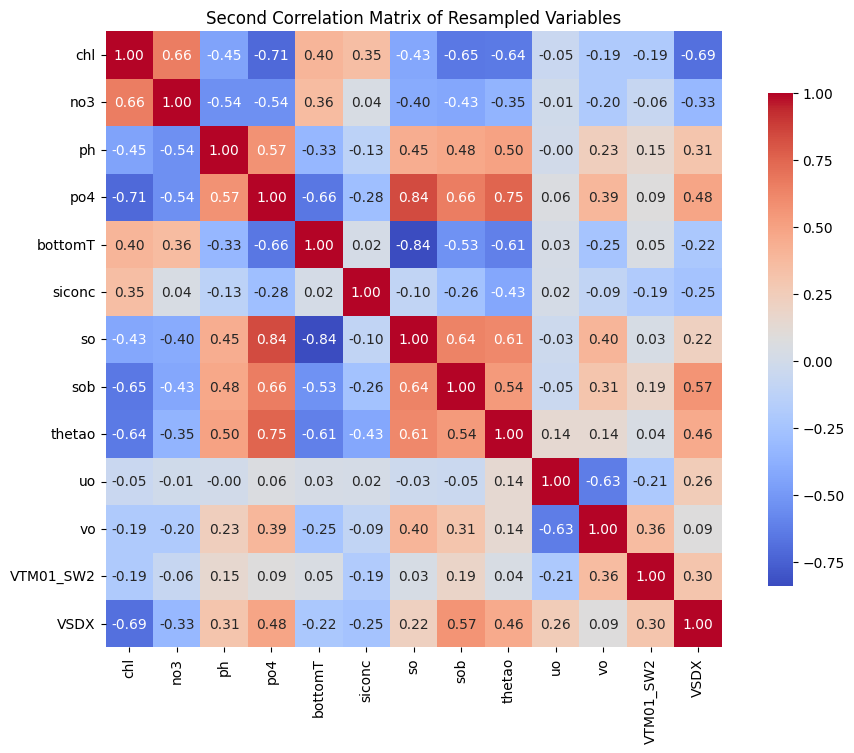

In [4]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Second Correlation Matrix of Resampled Variables')
plt.show()

`'bottomT'` (bottom temperature) and`'so'`(salinity) are highly correlated. It is difficult to choose between them but I will keep the bottom temperature because the salinity is also correlated to `'po4'` (phosphate consentration).

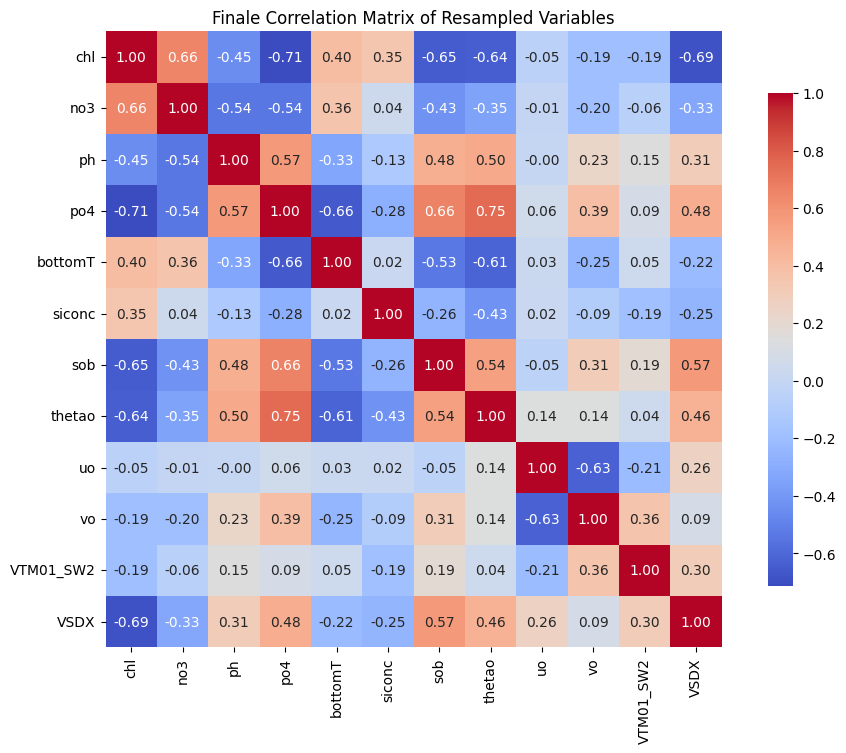

In [7]:
correlation_matrix = clipped_grid_4326.drop(columns=['geometry', 'VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK','so']).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Finale Correlation Matrix of Resampled Variables')
plt.show()

In [8]:
# Save the final variables inputs to a CSV file
inputs_variables = clipped_grid_4326.drop(columns=['VCMX', 'nppv', 'o2', 'zsd', 'sla','VHM0','VMXL','sithick','VHM0_SW2','VSDY','VTPK','so'])
inputs_variables.to_csv("data/02_inputs_environmental_variables.csv", index=False)